In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from math import sqrt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.duplicated().any()

True

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(283726, 31)

In [10]:
284807-283726

1081

In [11]:
df = df.drop('Time',axis=1)

In [12]:
df.value_counts('Class')

Class
0    283253
1       473
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

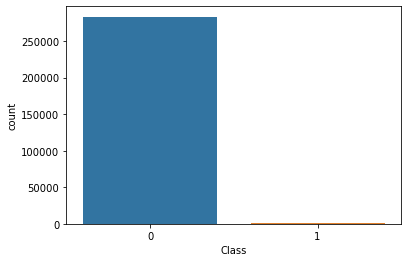

In [13]:
sns.countplot(df['Class'])

In [14]:
y = df['Class']

In [15]:
x = df.drop('Class',axis=1)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=101)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss=StandardScaler()

In [19]:
df['Amount'] = ss.fit_transform(df[['Amount']])

In [20]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


# LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(x_train,y_train)

LogisticRegression()

In [24]:
lr_pred = lr.predict(x_test)

In [25]:
lr_pred 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score


In [27]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84980
           1       0.86      0.59      0.70       138

    accuracy                           1.00     85118
   macro avg       0.93      0.79      0.85     85118
weighted avg       1.00      1.00      1.00     85118



In [28]:
print(confusion_matrix(y_test,lr_pred))

[[84967    13]
 [   57    81]]


In [29]:
print(accuracy_score(y_test,lr_pred))

0.999177612255927


In [30]:
print(f1_score(y_test,lr_pred))

0.6982758620689654


# xgboost

In [63]:
import xgboost
from xgboost import XGBClassifier
xb = XGBClassifier()
xb.fit(x_train,y_train)
xb_pred = xb.predict(x_test)
print(accuracy_score(y_test,xb_pred))
print(f1_score(y_test,xg_pred))

0.9996123029206513
0.003326182843645304


# AdaBoostClassifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)
ab_pred = ab.predict(x_test)
print(accuracy_score(y_test,ab_pred))
print(f1_score(y_test,xg_pred))

0.9990953734815198
0.003326182843645304


# DecisionTreeClassifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
print(accuracy_score(y_test,dtc_pred))
print(f1_score(y_test,xg_pred))

0.9993185930120538
0.003326182843645304


# RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc = RandomForestClassifier(n_jobs=-1)

In [36]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [37]:
rfc_pred = rfc.predict(x_test)

In [38]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84980
           1       0.93      0.78      0.85       138

    accuracy                           1.00     85118
   macro avg       0.97      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118



In [39]:
print(confusion_matrix(y_test,lr_pred))

[[84967    13]
 [   57    81]]


In [40]:
print(accuracy_score(y_test,lr_pred))

0.999177612255927


# Sampling

In [41]:
#over_sampling
from imblearn.over_sampling import SMOTE

In [42]:
over_sample = SMOTE()

In [43]:
x_smote,y_smote = over_sample.fit_resample(x_train,y_train)

In [44]:
y_smote.value_counts()

0    198273
1    198273
Name: Class, dtype: int64

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_smote,y_smote)
lr_pred = lr.predict(x_test)
print(accuracy_score(y_test,lr_pred))
print(f1_score(y_test,lr_pred))

0.9798984938555887
0.1310309801929914


In [46]:
print(confusion_matrix(y_test,lr_pred))

[[83278  1702]
 [    9   129]]


In [47]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84980
           1       0.07      0.93      0.13       138

    accuracy                           0.98     85118
   macro avg       0.54      0.96      0.56     85118
weighted avg       1.00      0.98      0.99     85118



In [48]:
from xgboost import XGBClassifier
xg =XGBClassifier()
xg.fit(x_smote,y_smote)
xg_pred = xg.predict(x_test)
print(accuracy_score(y_test,xg_pred))
print(f1_score(y_test,xg_pred))

0.9994595737681806
0.8402777777777779


In [64]:
dtc.fit(x_smote,y_smote)
dtc_pred = dtc.predict(x_test)
print(accuracy_score(y_test,dtc_pred))
print(f1_score(y_test,dtc_pred))

0.99743884959703
0.4976958525345623


In [50]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84980
           1       0.81      0.88      0.84       138

    accuracy                           1.00     85118
   macro avg       0.90      0.94      0.92     85118
weighted avg       1.00      1.00      1.00     85118



In [51]:
#under_sampling
from imblearn.under_sampling import NearMiss

In [52]:
NearMiss_obj = NearMiss()

In [53]:
new_x,new_y = NearMiss_obj.fit_resample(x,y)

In [54]:
new_x.shape

(946, 29)

In [55]:
new_y.shape

(946,)

In [56]:
new_y.value_counts()

0    473
1    473
Name: Class, dtype: int64

In [57]:
#Logistic regression
lr.fit(new_x,new_y)
lr_pred = lr.predict(x_test)
print(accuracy_score(y_test,lr_pred))
print(f1_score(y_test,lr_pred))

0.1422025893465542
0.0036842967086949405


In [58]:
#XGBoost
xg.fit(new_x,new_y)
xg_pred = xg.predict(x_test)
print(accuracy_score(y_test,xg_pred))
print(f1_score(y_test,xg_pred))

0.028384125566860124
0.003326182843645304


In [65]:
#AdaBoost
ab.fit(new_x,new_y)
ab_pred = ab.predict(x_test)
print(accuracy_score(y_test,ab_pred))
print(f1_score(y_test,ab_pred))

0.0635000822387744
0.0034504744402355323


In [66]:
#Decision Tree
dtc.fit(new_x,new_y)
dtc_pred = dtc.predict(x_test)
print(accuracy_score(y_test,dtc_pred))
print(f1_score(y_test,dtc_pred))

0.2196127728565051
0.004137868997466305
